In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
!pip install keras_preprocessing
from keras_preprocessing.image import ImageDataGenerator
!pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout,SpatialDropout2D,BatchNormalization

import glob, os, random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 460.5 kB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p images
!unzip -q /content/drive/MyDrive/rice.zip -d images

In [ ]:
rice_imgs = '/content/images/rice/'

img_list = glob.glob(os.path.join(rice_imgs, '*/*.jpg'))

print(len(img_list))

5340


In [ ]:
train_rice=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test_rice=ImageDataGenerator(rescale=1/255,
                        validation_split=0.1) #Mas pequeño al ser pocos datos

train_generator_r=train_rice.flow_from_directory(rice_imgs,
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training',seed=42)

test_generator_r=test_rice.flow_from_directory(rice_imgs,
                                        target_size=(64,64),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation',seed=42)

labels = (train_generator_r.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 4807 images belonging to 3 classes.
Found 533 images belonging to 3 classes.
{'Blast': 0, 'Brown': 1, 'Healthy': 2}
{0: 'Blast', 1: 'Brown', 2: 'Healthy'}


In [ ]:
labels_rice = os.listdir(rice_imgs)
labels_rice

['Blast', 'Brown', 'Healthy']

In [ ]:
for i in labels_rice:
    directory = os.path.join(rice_imgs, i)
    print("Images of label \"" + i + "\":\t", len(os.listdir(directory)))

Images of label "Blast":	 2988
Images of label "Brown":	 1532
Images of label "Healthy":	 820


<Figure size 2000x1000 with 0 Axes>

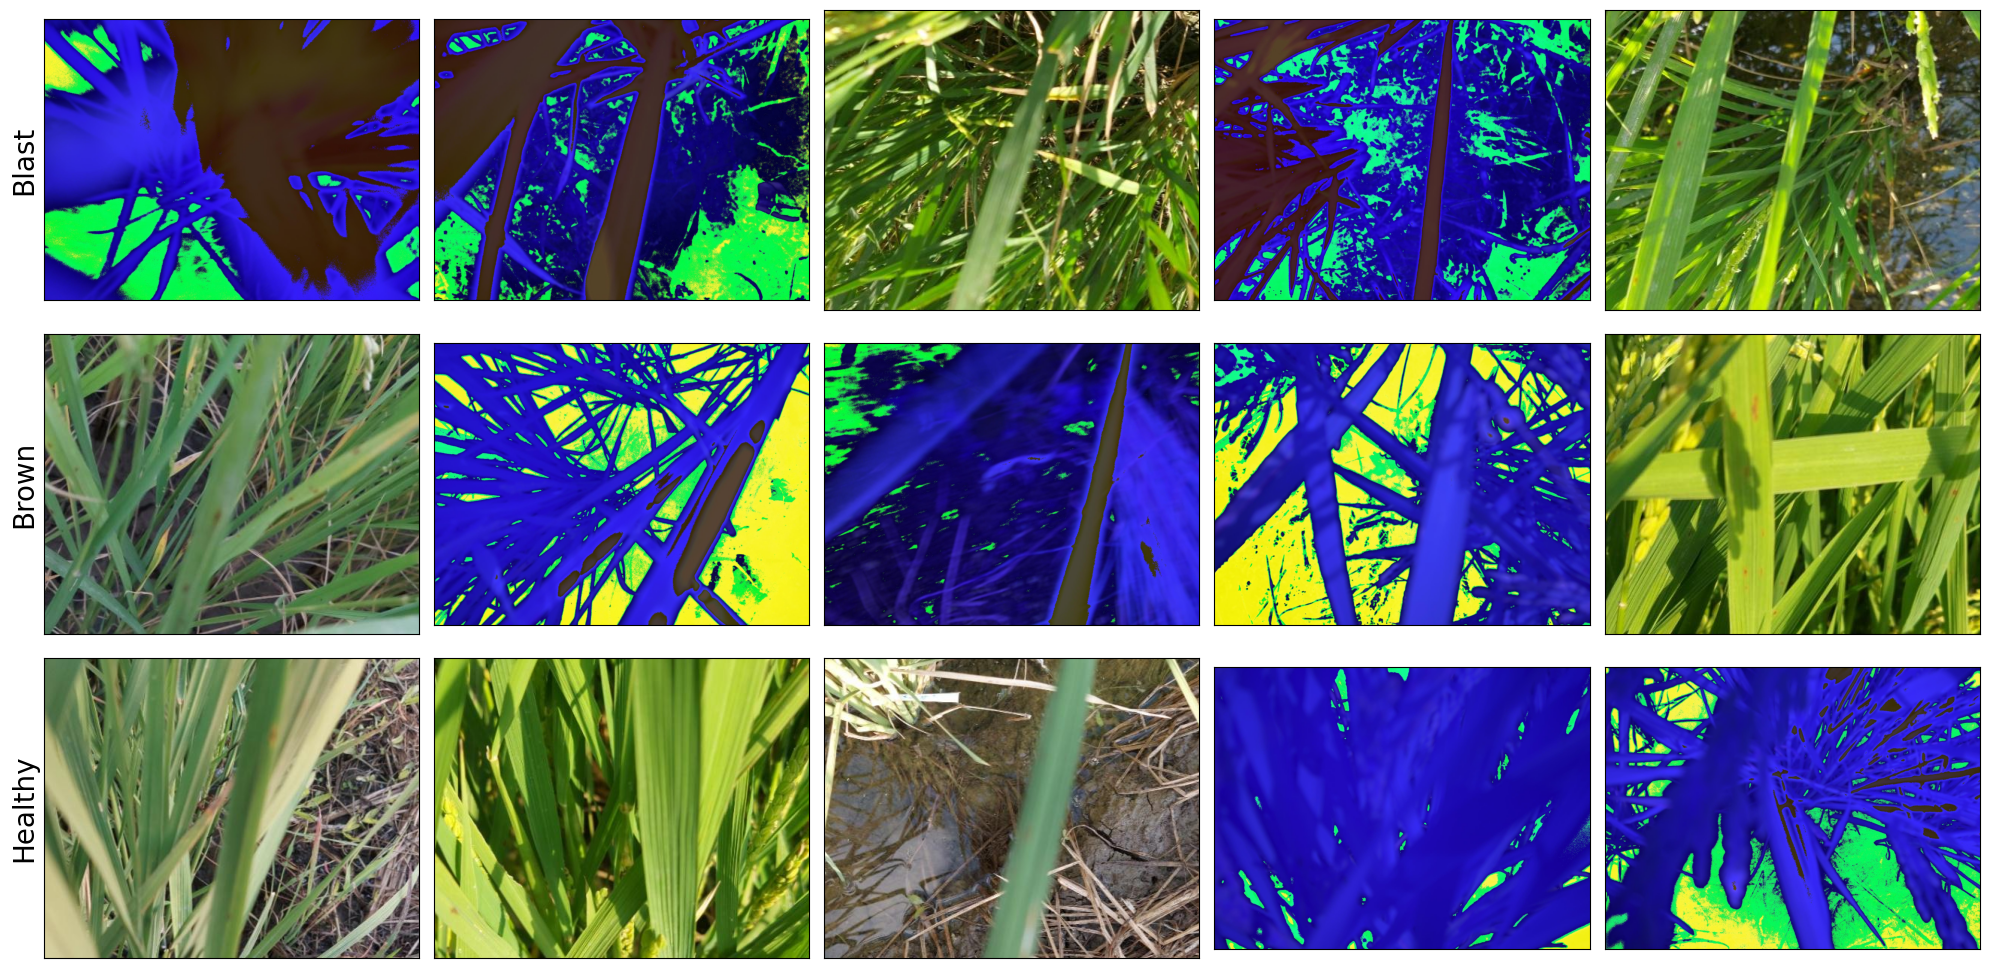

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(20,10))

plt.figure(figsize=(20,10))

for i in range(3):
    directory = os.path.join(rice_imgs, labels_rice[i])
    for j in range(5):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)

        plt.subplot(3, 5, i*5 + j + 1)
        plt.imshow(img)

        if j == 0:
            plt.ylabel(labels_rice[i], fontsize=20)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
X_train=np.concatenate([train_generator_r.next()[0] for i in range(train_generator_r.__len__())])
y_train=np.concatenate([train_generator_r.next()[1] for i in range(train_generator_r.__len__())])
print(X_train.shape)
print(y_train.shape)

(4807, 64, 64, 3)
(4807, 3)


In [ ]:
X_test=np.concatenate([test_generator_r.next()[0] for i in range(test_generator_r.__len__())])
y_test=np.concatenate([test_generator_r.next()[1] for i in range(test_generator_r.__len__())])
print(X_test.shape)
print(y_test.shape)

(533, 64, 64, 3)
(533, 3)


In [ ]:
d2_X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
d2_X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3])
print(d2_X_train.shape)
print(d2_X_test.shape)

(4807, 12288)
(533, 12288)


In [ ]:
import warnings

from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(
    hidden_layer_sizes=(64,32,16,3),
    activation="relu" ,
    max_iter=1000,
    alpha=1e-4,
    solver="sgd",# mejor para datasets pequennos
    verbose=10,
    random_state=1,
    learning_rate_init=0.005,
)

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(d2_X_train, y_train)

print("Training set score: %f" % mlp.score(d2_X_train, y_train))
print("Test set score: %f" % mlp.score(d2_X_test, y_test))

Iteration 1, loss = 2.08732645
Iteration 2, loss = 1.82508434
Iteration 3, loss = 1.72601555
Iteration 4, loss = 1.72014270
Iteration 5, loss = 1.71856375
Iteration 6, loss = 1.71866725
Iteration 7, loss = 1.71777090
Iteration 8, loss = 1.71581399
Iteration 9, loss = 1.71494592
Iteration 10, loss = 1.71307126
Iteration 11, loss = 1.71291404
Iteration 12, loss = 1.71436478
Iteration 13, loss = 1.71200510
Iteration 14, loss = 1.71459070
Iteration 15, loss = 1.70857550
Iteration 16, loss = 1.70745144
Iteration 17, loss = 1.70473860
Iteration 18, loss = 1.70926558
Iteration 19, loss = 1.69964230
Iteration 20, loss = 1.69598528
Iteration 21, loss = 1.69093193
Iteration 22, loss = 1.83096616
Iteration 23, loss = 1.74709323
Iteration 24, loss = 1.72270649
Iteration 25, loss = 1.71851202
Iteration 26, loss = 1.71728096
Iteration 27, loss = 1.71722469
Iteration 28, loss = 1.71689743
Iteration 29, loss = 1.71716249
Iteration 30, loss = 1.71657271
Iteration 31, loss = 1.71637096
Iteration 32, los

In [ ]:
predictions = mlp.predict(d2_X_test)
# Get most likely class
predicted_classes3 = np.argmax(predictions, axis=1)

In [ ]:
from sklearn import metrics
true_classes = test_generator_r.classes
class_labels = list(test_generator_r.class_indices.keys())
report = metrics.classification_report(true_classes, predicted_classes3, target_names=class_labels, zero_division=0)
print(report)

              precision    recall  f1-score   support

       Blast       0.56      1.00      0.72       298
       Brown       0.00      0.00      0.00       153
     Healthy       0.00      0.00      0.00        82

    accuracy                           0.56       533
   macro avg       0.19      0.33      0.24       533
weighted avg       0.31      0.56      0.40       533



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [ ]:
DATADIR = '/content/images/rice/'
CATEGORIES = labels_rice
IMG_SIZE=100

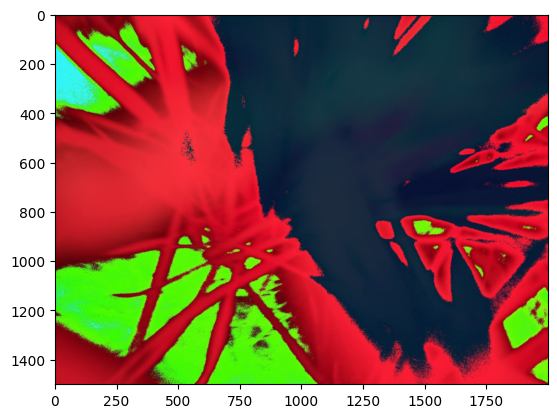

In [ ]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [ ]:
print(len(training_data))

5340


In [ ]:
lenofimage = len(training_data)

In [ ]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [ ]:
X.shape

(5340, 30000)

In [ ]:
X = X/255.0

In [ ]:
X[1]

array([0.05098039, 0.11764706, 0.22352941, ..., 0.26666667, 0.96862745,
       0.04313725])

In [ ]:
y=np.array(y)

In [ ]:
y.shape

(5340,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
y2 = svc.predict(X_test)

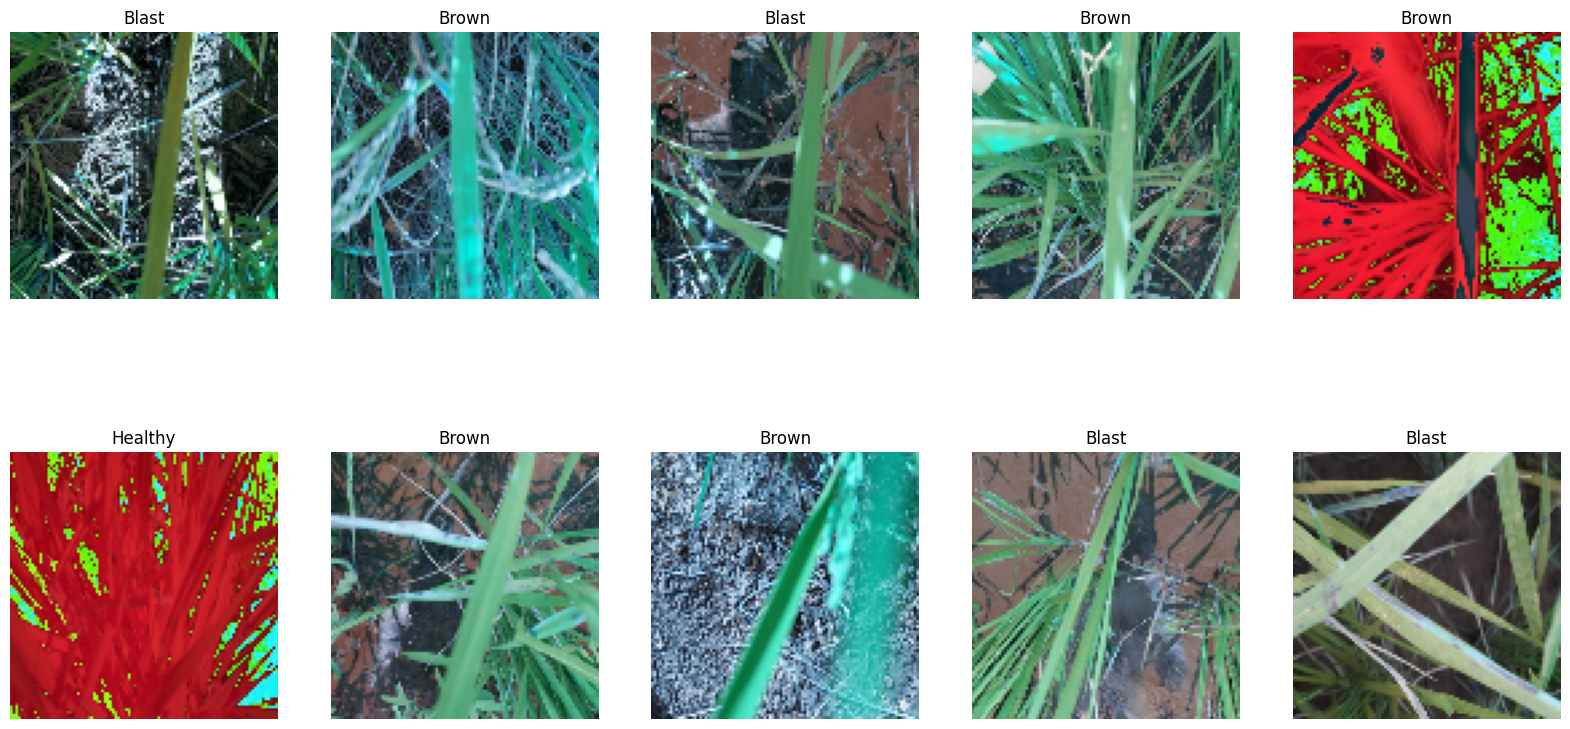

In [ ]:

# Get the indices of images where the predicted label matches the true label
correct_indices = np.where(y2 == y_test)[0]

# Select a random subset of correct predictions to display
num_images = 10
indices_to_display = np.random.choice(correct_indices, size=num_images, replace=False)

# Display the selected images
plt.figure(figsize=(20, 10))
for i, index in enumerate(indices_to_display):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[index].reshape(IMG_SIZE, IMG_SIZE, 3))
    plt.title(class_labels[y2[index]])
    plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy  is",accuracy_score(y_test,y2))

Accuracy  is 0.5138576779026217


In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y2,target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       Blast       0.63      0.68      0.66       754
       Brown       0.37      0.36      0.37       384
     Healthy       0.22      0.17      0.19       197

    accuracy                           0.51      1335
   macro avg       0.41      0.40      0.40      1335
weighted avg       0.50      0.51      0.50      1335



In [ ]:
def plot_cm(cm, title=""):
    fig = px.imshow(cm,x=class_labels,y=class_labels,title=title)
    fig.show()

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y2,normalize='true')
plot_cm(conf_mat, "Confusion Matrix (Test)")